In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
%pprint off
#plt.style.use('seaborn')

In [ ]:
sns.set_style("ticks")

## Preparing the dataframes

In [ ]:
df_all = pd.read_csv('data/dataport-export_gas_oct2015-mar2016.csv')
len(df_all)

In [ ]:
df_all = df_all.set_index(pd.to_datetime(df_all['localminute']))

In [ ]:
df_all = df_all.drop(columns='localminute')
display(df_all.head())

In [ ]:
groups = df_all.groupby('dataid')
keys = groups.groups.keys()  # keys: an iterable of dataids or meter ids

# check if each group (grouped by meter id) is sorted in ascending order by datetime.
# for key in keys:
#     df_i = groups.get_group(key)
#     print(df_i.index.is_monotonic_increasing)
# each group is already sorted in ascending order by datetime.

### Check meterids

In [ ]:
keys_list = list(keys)
print(keys_list)

### Print full-length (6 mth) plot by meterid.

In [ ]:
# for key in keys_list:    
#     df_i = groups.get_group(key)
#     df_i.drop(columns='dataid').plot(figsize=(15,4), title=str(f'meter {key}'))

In [ ]:
key = 3134
df_i = groups.get_group(key).drop(columns='dataid')

### Select data by datetime period. e.g. 1 month. i.e. Zoom in.

In [ ]:
def zoom(df, start_date, end_date):
    # pre-condition: df is indexed by datetime.
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    mask = (df.index >= start_date) & (df.index <= end_date)

    new_df = df.iloc[mask]
    return new_df
    
df_i_bymonth = zoom(df_i, '2015-12-01', '2016-01-01')
df_i_bymonth.plot(figsize=(15,4), title=str(f'meter {key}'))

### Resample with hourly frequency.

In [ ]:
df_i_bymonth_resampled = df_i_bymonth.resample('H').mean().ffill()
df_i_bymonth_resampled.plot(figsize=(15,4), title=str(f'meter {key}'))
display(len(df_i_bymonth_resampled))

### Iterate and plot december's hourly-resampled data for each suspicious meter (spiking values).

In [ ]:
suspicious_meters_list = [1185, 1556, 2335, 2449, 3134, 3544, 4447, 4514, \
                          5129, 5403,6836, 7030, 7117, 8156, 9134, 9639, 9982]

# for meter in suspicious_meters_list:
#     df_i = groups.get_group(meter)
#     df_i_bymonth = zoom(df_i, '2015-12-01', '2016-01-01').drop(columns='dataid')
#     df_i_bymonth_resampled = df_i_bymonth.resample('H').mean().ffill()
#     df_i_bymonth_resampled.plot(figsize=(15,4), title=str(f'meter {meter}, {len(df_i_bymonth_resampled)} samples'))


We clearly see that there is some obvious malfunctioning happening within 7-14 Dec 2015.

### Zoom in deeper within the time period (e.g. one day/24h)

In [ ]:
df_i_byday = zoom(df_i_bymonth_resampled, '2015-12-11', '2015-12-12')
df_i_byday.plot(figsize=(15,4), title=str(f'meter {key}'))

In [ ]:
# for i in range(7):
#     start_date = f'2015-12-{8+i}'
#     end_date = f'2015-12-{9+i}'
#     df_i_byday = zoom(df_i_bymonth_resampled, start_date, end_date)
#     df_i_byday.plot(figsize=(15,4), title=str(f'meter {key}'))

In [ ]:
less500_list = [4874, 6101, 9620, 7566, 5545, 2814, 2946, 2755,\
                9160, 2645, 6685, 1403, 8703, 9600, 3036, 5658]

def get_month_counts(df_i):
    # get count of samples per month
    df_i_resample_monthly_count = df_i.resample('M').count().rename(columns={'meter_value': 'count'})  
    return df_i_resample_monthly_count

for meter in less500_list:
    df_i = groups.get_group(meter)
    df_i_counts = get_month_counts(df_i)
    display(df_i_counts.head(6))


In [ ]:
count_list = []
for key in keys_list:
    df_i = groups.get_group(key)
    count_list.append(len(df_i.index))
    
less2000_mask = np.asarray(count_list) < 2000
display(less2000_mask)

In [ ]:
less2000_list = []
for i in range(len(less2000_mask)):
    if less2000_mask[i] == True:
        less2000_list.append(keys_list[i])

display(less2000_list)

In [ ]:
# for meter in less2000_list:
#     df_i = groups.get_group(meter).drop(columns='dataid')
#     df_i_resample_monthly_count = df_i.resample('M').count()  # get count of samples per month
    
#     display(f'avg sample per month: {len(df_i)/len(df_i_resample_monthly_count)}',\
#             f'nmonths={len(df_i_resample_monthly_count)}')

### Resample data hourly, taking last value in the hour as new value.
For each meter:
- Visualise 6month usage
- Visualise 1month usage
- Visualise 1day usage

In [ ]:
# # Resample by taking last cumulative reading for each hour.

# key = keys_list[4]
# df_i = groups.get_group(key).drop(columns='dataid')
# df_i.plot(figsize=(15,4), title=str(f'meter {key}'))

# # resample hourly using last reading for each hour, forward-filling any missing values
# df_i_resample_hourly = df_i.resample('H').last().ffill()
# df_i_resample_hourly.plot(figsize=(15,4), title=str(f'meter {key}'))

# display(f'total samples: {len(df_i)}')
# display(f'no. of hours: {len(df_i_resample_hourly)}')
# first_date = df_i.index.values[0] 
# last_date = df_i.index.values[-1]
# display(f'first date: {first_date}')
# display(f'last date: {last_date}')
# display(df_i_resample_hourly.tail())

# # zoom in to particular month
# df_i_month = zoom(df_i_resample_hourly, '2016-01-01', '2016-02-01')
# df_i_month.plot(figsize=(15,4), title=str(f'meter {key}'))

# # zoom in to particular day
# df_i_day = zoom(df_i_month, '2016-01-02', '2016-01-03')
# df_i_day.plot(figsize=(15,4), title=str(f'meter {key}'))

# # find hour on hour change, i.e. marginal hourly usage
# # this is useful to notice hourly consumption patterns
# df_i_day.diff().plot(figsize=(15,4), title=str(f'meter {key}'))

In [ ]:
def remove_mal_data(df):
    # this method finds the start datetime and end datetime of the malfunctioning period and returns a new df without data
    # from that period. NOTE that a new column 'marginal_change' is added to the df.
    
    # from visualising the data, we can arbitrarily define a spike as a marginal difference of > 2000 cubic metres
    # we have defined malfunction as a marginal increase > 2000
    # and a marginal increase < -2000.
    threshold = 2000
    df['marginal_change'] = df['meter_value'].diff()
    
    flagged_dates = df[df.marginal_change > threshold].index
    flagged_dates = flagged_dates.append(df[df.marginal_change < -1*threshold].index)
    
    if len(flagged_dates) > 0:
        start = flagged_dates[0]
        end = flagged_dates[-1]    
        mask = (df.index >= start) & (df.index <= end)
        return df.loc[~mask]
    else:
        return df
    

In [ ]:
key = 1185
df_i = groups.get_group(key).drop(columns='dataid')
display(len(df_i))

df_i_clean = remove_mal_data(df_i)
display(len(df_i_clean))

df_i_clean.meter_value.plot(figsize=(15,4), title=str(f'meter {key}'))

In [ ]:
def remove_negative_marginal(df):
    # remove data points where the marginal change (from prev value) is negative.
    return df.loc[df.marginal_change >= 0]

In [ ]:
def remove_outliers(df, coeff=1.5):
    # remove outliers using *IQR rule.
    tmp_df = df.loc[df.marginal_change > 1]
    Q1 = tmp_df['marginal_change'].quantile(0.25)
    Q3 = tmp_df['marginal_change'].quantile(0.75)
    IQR = Q3 - Q1
    
    #print(f'{Q1, Q3, IQR}')
    
    # Filtering Values between Q1-coeff*IQR and Q3+coeff*IQR
    return df.query('(@Q1 - @coeff * @IQR) <= marginal_change <= (@Q3 + @coeff * @IQR)')

In [ ]:
display(len(df_i_clean))

In [ ]:
df_i_filtered = remove_outliers(df_i_clean)
display(len(df_i_filtered))

In [ ]:
df_i_filtered['meter_value'].plot()

### Apply cleaning, resampling, and 1.5IQR-filtering to entire 6 month period.

In [ ]:
for key in suspicious_meters_list:
    df_i = groups.get_group(key).drop(columns='dataid')
    display(len(df_i))
   
    # first, clean data by removing obvious dirty datapoints
    df_i_clean = remove_mal_data(df_i)
    df_i_clean = remove_negative_marginal(df_i_clean)
    
    # next, resample data by hour. 
    # NOTE: this step looks premature because the remaining cumulative readings are not correct.
    df_i_resampled = df_i_clean.drop(columns='marginal_change').resample('H').mean().ffill()
    display(df_i_resampled.head())
    
    # then, obtain new marginal changes.
    df_i_resampled['marginal_change'] = df_i_resampled['meter_value'].diff()
    display(df_i_resampled.head())
    df_i_resampled['marginal_change'].plot(figsize=(15,4), title=str(f'meter {key}'))
    display(len(df_i_resampled))
    
    # finally, filter by the 1.5IQR rule on marginal_change.
    df_i_filtered = remove_outliers(df_i_resampled)
    display(len(df_i_filtered))

    df_i_filtered['marginal_change'].plot(figsize=(15,4), title=str(f'meter {key}'))
    break

Above code snippet and output shows that IQR-filtering should not be applied to the entire 6 months, because of seasonal changes in household use of gas.

IQR-filtering seems more reasonable after constraining the time period to one month.

In [ ]:
# Plotting test
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,6))

df_i.plot(ax=axes[0,0], title='hi')
df_i.plot(ax=axes[0,1], title='hi')
df_i.plot(ax=axes[1,0], title='hi')
axes[0,0].clear()

In [ ]:
df_i.plot(ax=axes[0,0], title='hi')
df_i.plot(ax=axes[0,1], title='hi')
df_i.plot(ax=axes[1,0], title='hi')

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,6))  
# seems like I must call this again everytime i plot in a new cell?
# otherwise, no plot is shown when I call plot().

df_i.plot(ax=axes[0,0], title='hi')
df_i.plot(ax=axes[0,1], title='hi')
df_i.plot(ax=axes[1,0], title='hi')

In [ ]:
# zoom into 1 month
key = 1185
df_i = groups.get_group(key).drop(columns='dataid')
df_i_1mth = zoom(df_i, '2016-01-01', '2016-02-01')

def clean_resample_filter2(key, df, showplot=False):
    # v2 of this method uses/tests multiple plots
    # pre-condition, df_i has has numerical data to plot.
    
    # first, clean data by removing obvious dirt
    df_i_clean = remove_mal_data(df)
    df_i_clean = remove_negative_marginal(df_i_clean)

    # next, resample data by hour.
    df_i_resampled = df_i_clean.drop(columns='marginal_change').resample('H').mean().ffill()
    #display(df_i_resampled.head())

    # then, obtain new marginal changes.
    df_i_resampled['marginal_change'] = df_i_resampled['meter_value'].diff()
    
    # finally, filter by the IQR rule on marginal_change.
    # 1.5IQR filter
    df_i_filtered15 = remove_outliers(df_i_resampled, 1.5)
    
    if showplot:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,3))
        # plot
        df_i_resampled['marginal_change'].plot(ax=axes[0])
        if len(df_i_filtered15) > 0:
            df_i_filtered15['marginal_change'].plot(ax=axes[0], \
                                                title=str(f'meter {key}, 1.5IQR, bef:{len(df_i_resampled)}, aft:{len(df_i_filtered15)}'))
        # 3.0IQR filter
        df_i_filtered30 = remove_outliers(df_i_resampled, 3.0)

        # plot
        df_i_resampled['marginal_change'].plot(ax=axes[1])
        if len(df_i_filtered30) > 0:
            df_i_filtered30['marginal_change'].plot(ax=axes[1], \
                                                    title=str(f'meter {key}, 3.0 IQR, bef:{len(df_i_resampled)}, aft:{len(df_i_filtered30)}'))
    
    return df_i_filtered15


### Find meters for which readings are sparse in a particular month;

In [ ]:
start = '2016-01-01'
end = '2016-02-01'

lack_data_for_monthx = [] 
for key in keys_list:
    df_i = groups.get_group(key).drop(columns='dataid')
    df_i_1mth = zoom(df_i, start, end)
    
    if len(df_i_1mth) > 1:
        df_i_counts = get_month_counts(df_i_1mth)
        if df_i_counts['count'].values[0] < 3:
            lack_data_for_monthx.append(key)
    else:
        lack_data_for_monthx.append(key)
print(lack_data_for_monthx)

In [ ]:
# malfunctioning and sparse readings
to_remove = [1185, 1556, 2335, 2449, 3134, 3544, 4447, 4514,\
             5129, 5403, 6836, 7030, 7117, 8156, 9134, 9639, 9982]

to_remove.extend(lack_data_for_monthx)

display(to_remove, len(to_remove))

In [ ]:
# to_keep = [elem for elem in keys_list if elem not in to_remove]

# for key in to_keep:
#     df_i = groups.get_group(key).drop(columns='dataid')
#     df_i_1mth = zoom(df_i, start, end)   
#     clean_resample_filter2(key, df_i_1mth)

### integrate data prep section with the correlation section (q1.3)

In [ ]:
# select month
start = '2016-01-01'
end = '2016-02-01'

# find meters for which there is a lack of data in that month
lack_data_for_monthx = [] 
for key in keys_list:
    df_i = groups.get_group(key).drop(columns='dataid')
    df_i_1mth = zoom(df_i, start, end)
    
    if len(df_i_1mth) > 1:
        df_i_counts = get_month_counts(df_i_1mth)
        if df_i_counts['count'].values[0] < 3:
            lack_data_for_monthx.append(key)
    else:
        lack_data_for_monthx.append(key)
print(lack_data_for_monthx)

# malfunctioning meters and meters with sparse readings
to_remove = [1185, 1556, 2335, 2449, 3134, 3544, 4447, 4514,\
             5129, 5403, 6836, 7030, 7117, 8156, 9134, 9639, 9982]

to_remove.extend(lack_data_for_monthx)

display(to_remove, len(to_remove))

# meters to use for computation
to_keep = [elem for elem in keys_list if elem not in to_remove]

df_all = pd.DataFrame()
for key in [114]:
    df_i = groups.get_group(key).drop(columns='dataid')
    df_i_1mth = zoom(df_i, start, end)   
    df_i_filtered = clean_resample_filter2(key, df_i_1mth).rename(columns={'marginal_change': f'marginal {key}'})
    df_all = pd.concat([df_all, df_i_filtered[f'marginal {key}']], axis=1)

display(df_all.head())

### clean, resample, filter all valid meters

In [ ]:
df_all = pd.DataFrame()
for key in to_keep:
    df_i = groups.get_group(key).drop(columns='dataid')
    df_i_1mth = zoom(df_i, start, end)   
    df_i_filtered = clean_resample_filter2(key, df_i_1mth).rename(columns={'marginal_change': f'marginal_{key}'})
    df_all = pd.concat([df_all, df_i_filtered[f'marginal_{key}']], axis=1)
           
display(df_all.head())

In [ ]:
df_all.tail()

In [ ]:
display(df_all.isna())
df_all_nonan = df_all.fillna(0)

In [ ]:
display(df_all_nonan.head())

### Scatterplot of all meters over selected month/s. Marginal change vs time (hours).

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,3))
# plot
for key in to_keep:
    axes.scatter(df_all_nonan.index, df_all_nonan[f'marginal_{key}'])

### Find correlations between households.

In [ ]:
df_corr_month = df_all_nonan.corr()

In [ ]:
string = '{}:00'
new_dict = dict()

for i in range(0,24):
    datatemp = pd.DataFrame(df_all_nonan.between_time(string.format(i),string.format(i)))
    new_dict[i] = datatemp

In [ ]:
print(new_dict[15])

In [ ]:
df_total = pd.DataFrame()
for hour in range(24):    
    # generate corr matrix
    corr_matrix = new_dict[hour].corr().fillna(0)
    #display(i, isnan, corr_matrix)
    
    df_hour = pd.DataFrame(columns=['r', 'id'])
    # find top 5 positive correlations per meterid
    for meterid in to_keep:    
        df_corr_sorted = corr_matrix[f'marginal_{meterid}'].sort_values(ascending=False)
        sr_top5 = df_corr_sorted.iloc[1:6]
        df_top5 = sr_top5.to_frame()
        df_top5 = df_top5.rename(columns={f'marginal_{meterid}': 'r'})

        data = [meterid for i in range(5)]
        df_top5 = df_top5.assign(id=data)
        #display(df_top5)

        df_hour = df_hour.append(df_top5)
    #display(df_hour)
    #df_hour.to_csv(f'report/{hour}_corr.csv')    

In [ ]:
df_corr_month

df_hour = pd.DataFrame(columns=['r', 'id'])
for meterid in to_keep:    
    df_corr_sorted = df_corr_month[f'marginal_{meterid}'].sort_values(ascending=False)
    sr_top5 = df_corr_sorted.iloc[1:6]
    df_top5 = sr_top5.to_frame()
    df_top5 = df_top5.rename(columns={f'marginal_{meterid}': 'r'})

    data = [meterid for i in range(5)]
    df_top5 = df_top5.assign(id=data)
    #display(df_top5)

    df_hour = df_hour.append(df_top5)
    
display(df_hour.head(), df_hour.tail())

In [ ]:
# df_hour.to_csv('report/corr_month.csv')

### construct new dataframe in the format required by ML models

In [ ]:
df_combinedxy = pd.DataFrame()
for meterid in to_keep:
    df_x = df_all_nonan.index.to_series()
    df_y = df_all_nonan[f'marginal_{meterid}']
    df_xy = pd.concat([df_x, df_y], axis=1, ignore_index=True)
    df_combinedxy = df_combinedxy.append(df_xy, ignore_index=True)
df_combinedxy.columns = ['localminute', 'marginal_change']

In [ ]:
display(df_combinedxy.head(10))
display(len(df_combinedxy))

### Try out seasonal-trend decomposition.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

743

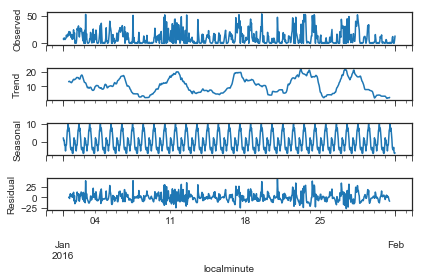

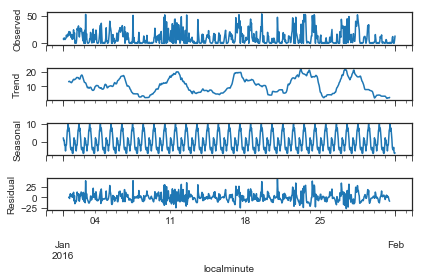

In [76]:
result = seasonal_decompose(df_all_nonan[f'marginal_{to_keep[100]}'], model="additive")
display(result.nobs)
result.plot()

In [77]:
# Need to figure out how this naive decomposition can inform our analysis or further steps.
# How to compare the trends and seasonality of each meter?
# How can this info be used in the forecasting model?
# what to present as inputs into the forecasting model? just the datetime? how about a variable representing time of day?

In [ ]:
# define the forecasting model.
# should we be predicting the consumption for a particular meterid? or should i be predicting the average consumption
# regardless of meterid?

# if predicting consumption for a particular meterid, then it may make sense to include other highly correlated meterid's
# readings as inputs/features/regressors.

In [ ]:
# for part2.2 need to create train and test set.
# for part2.3 need to create train, cv (to tune parameters of SVR) and test set? 
# but then how to compare part2.2 and part2.3 like this?